In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as sp

In [2]:
data=pd.read_csv('car.txt',header=None)
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
#做简单的数据分析，看一下字段情况
print(data[0].value_counts())

low      432
high     432
med      432
vhigh    432
Name: 0, dtype: int64


In [4]:
print(data[6].value_counts())

unacc    1210
acc       384
good       69
vgood      65
Name: 6, dtype: int64


In [5]:
import sklearn.ensemble as se
import sklearn.model_selection as ms

In [6]:
#1.整理样本、数据预处理
train_data=pd.DataFrame([])
#把每一列的标签编码器都存起来
encoders={}
for k,v in data.items():
    lbe=sp.LabelEncoder()
    new_col=lbe.fit_transform(v)
    train_data[k]=new_col
    encoders[k]=lbe
    
x,y=train_data.loc[:,:5],train_data[6]
#选择模型，做几次交叉验证，先看一下效果

model = se.RandomForestClassifier(max_depth=9,n_estimators=145,random_state=7)
score=ms.cross_val_score(model,x,y,scoring='f1_weighted')
print(score.mean())

0.7876819482475177


In [7]:
import matplotlib.pyplot as plt

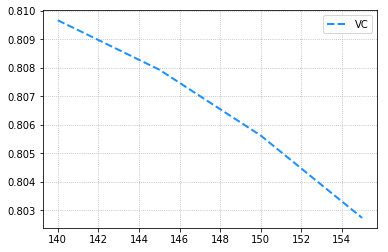

In [8]:
#通过验证曲线获取最优超参数
params=np.arange(140,160,5)
train_scores,test_scores=ms.validation_curve(model,x,y,'n_estimators',params,cv=5)
scores=test_scores.mean(axis=1)
#绘制验证曲线
plt.grid(linestyle=':')
plt.plot(params,scores,color='dodgerblue',linestyle='--',linewidth=2,label='VC')
plt.legend()

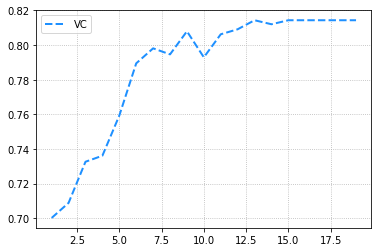

In [9]:
#通过验证曲线获取最优max_depth
params=np.arange(1,20)
train_scores,test_scores=ms.validation_curve(model,x,y,'max_depth',params,cv=5)
scores=test_scores.mean(axis=1)
#绘制验证曲线
plt.grid(linestyle=':')
plt.plot(params,scores,color='dodgerblue',linestyle='--',linewidth=2,label='VC')
plt.legend()

In [10]:
#使用模型进行预测
import sklearn.metrics as sm
model.fit(x,y)  #使用总样本空间进行模型训练
pred_y=model.predict(x)
print(sm.classification_report(y,pred_y))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       384
           1       1.00      0.75      0.86        69
           2       1.00      1.00      1.00      1210
           3       0.94      1.00      0.97        65

    accuracy                           0.99      1728
   macro avg       0.97      0.94      0.95      1728
weighted avg       0.99      0.99      0.99      1728



In [11]:
data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood']]
test_data=pd.DataFrame(data)
for k,v in test_data.items():
    new_col = encoders[k].transform(v)
    test_data[k]=new_col
#整理测试集的输入与输出
test_x,test_y=test_data.loc[:,:5],test_data[6]
pred_test_y=model.predict(test_x)
print(encoders[6].inverse_transform(pred_test_y))
print(encoders[6].inverse_transform(test_y))

['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'good' 'vgood']


In [12]:
pred_test_y

array([2, 0, 1, 3])

In [13]:
test_y

0    2
1    0
2    1
3    3
Name: 6, dtype: int64

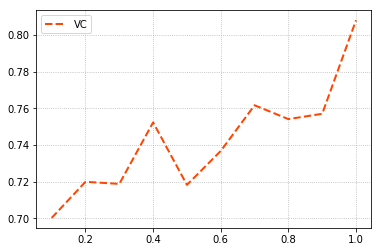

In [15]:
#通过学习曲线获取最优训练集大小
params=np.arange(0.1,1.1,0.1)
_,train_score,test_scores=ms.learning_curve(model,x,y,train_sizes=params,cv=5)
scores=test_scores.mean(axis=1)
plt.grid(linestyle=':')
plt.plot(params,scores,color='orangered',linestyle='--',linewidth=2,label='VC')
plt.legend()